#Student Name: Abhijit Sinha
#Student ID: 18195067

### Problem Description

A student is writing an exam without proper preparation, but wants a 100 out of 100 score. What are the chances of the score being a perfect 100 if the student tries 1000 attempts

In [2]:
%matplotlib inline

import numpy as np
import random as random
import matplotlib.pyplot as plt

In [3]:
# Run the experiment
num_trails = 1000
current_value = 0
samples = []

for i in range(num_trails):
    samples.append(random.randint(0,100))

# Mean
mean = np.mean(samples)
print("Mean of Samples: ", mean)

# Standard deviation
std_deviation = np.std(samples)
print("Standard Deviation: ", std_deviation)

print("Number of times the student gets a score of 100: ", samples.count(100))

Mean of Samples:  49.107
Standard Deviation:  29.586611009035828
Number of times the student gets a score of 100:  7


(array([17., 11.,  6., 16.,  7., 14.,  6., 10.,  6.,  8., 18., 17., 10.,
        11., 12.,  9.,  9., 11.,  9.,  6., 12., 13., 12., 14.,  7.,  7.,
        13.,  8., 10.,  7.,  4., 12.,  9., 14.,  6.,  5., 14., 10.,  7.,
        11.,  6.,  7., 14.,  9., 15.,  9.,  8.,  9.,  7., 10.,  9.,  8.,
         7., 13.,  9., 12.,  7., 13., 13., 11., 11.,  7.,  6., 10., 10.,
         5., 15., 12.,  9., 13.,  8., 12.,  6., 11., 12., 10.,  6.,  9.,
         8.,  9., 11.,  8., 10.,  9., 10., 10., 10., 12., 15., 13.,  4.,
         9., 10.,  7., 12.,  8.,  5., 17., 13., 14.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  6

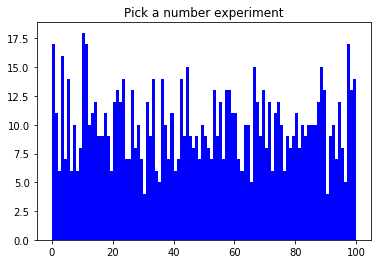

In [4]:
# Plot a histogram for the list of samples 
num_bins = 100 
plt.title("Pick a number experiment")
plt.hist(samples, num_bins, facecolor='blue', label="Exam score")
plt.show